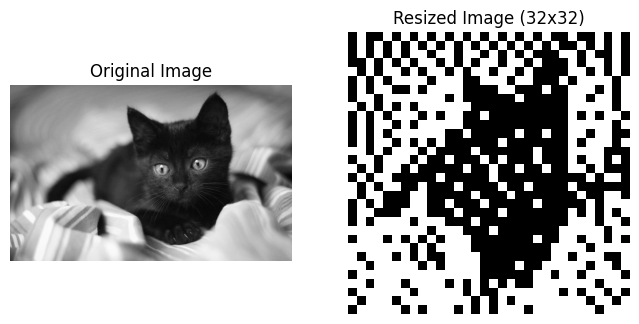

Shape of resized image array: (32, 32)


In [5]:
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt

# Load and display the original image
image = Image.open(r"D:\6m_NIC\images\newCat.webp")
image.show()

# Resize the image and convert to binary (1-bit pixels, black and white)
new_image = image.resize((32, 32)).convert('1')
new_image.save('IMAGE_32.png')

# Convert images to arrays for display
original_image_array = asarray(image)
resized_image_array = asarray(new_image)

# Display both images side by side
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image_array)
plt.title("Original Image")
plt.axis('off')

# Resized image
plt.subplot(1, 2, 2)
plt.imshow(resized_image_array, cmap='gray')
plt.title("Resized Image (32x32)")
plt.axis('off')

plt.show()

# Print the shape of the resized image array
print("Shape of resized image array:", resized_image_array.shape)


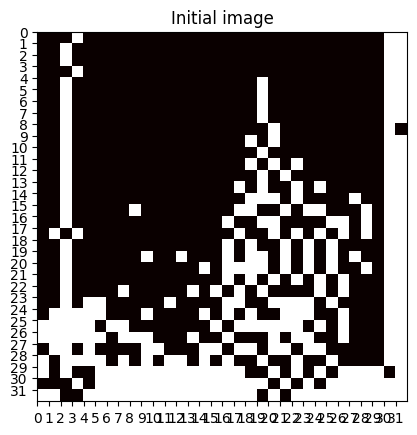

size= (32, 32)


In [6]:
def plot_image(Image, title):
    plt.title(title)
    plt.xticks(range(Image.shape[0]))
    plt.yticks(range(Image.shape[1]))
    plt.imshow(Image, extent=[  0,Image.shape[0], Image.shape[1],0,], cmap='hot')
    plt.show()
    
plot_image(imgg, 'Initial image')
print("size=",imgg.shape)

In [8]:
import numpy as np
from PIL import Image
from numpy import asarray

# Load and process the image
image = Image.open(r"D:\6m_NIC\images\cat.jpeg")
new_image = image.resize((32, 32)).convert('1')
imgg = asarray(new_image)

# Convert the raw pixel values to probability amplitudes
def amplitude_encode(img_data):
    # Calculate the RMS value
    rms_32 = np.sqrt(np.sum(np.sum(img_data**2, axis=1)))
    
    # Create normalized image
    image_norm = []
    for arr in img_data:
        for ele in arr:
            image_norm.append(ele / rms_32)
        
    # Return the normalized image as a numpy array
    return np.array(image_norm)

# Normalize image and get coefficients in both horizontal and vertical directions
# Horizontal: Original image
h_norm_image_32 = amplitude_encode(imgg)
print("Horizontal image normalized coefficients:", h_norm_image_32)

print()

# Vertical: Transpose of Original image
v_norm_image_32 = amplitude_encode(imgg.T)
print("Vertical image normalized coefficients:", v_norm_image_32)

print()
print("Size of 1D array (Horizontal):", h_norm_image_32.shape)
print("Size of 1D array (Vertical):", v_norm_image_32.shape)


Horizontal image normalized coefficients: [0.        0.        0.        ... 0.0562544 0.0562544 0.0562544]

Vertical image normalized coefficients: [0.        0.        0.        ... 0.0562544 0.0562544 0.0562544]

Size of 1D array (Horizontal): (1024,)
Size of 1D array (Vertical): (1024,)


In [9]:
#we require N=log(32*32) qubits 
#N=10

data_q_32 = 10
ancillary_q_32 = 1
total_q_32 = data_q_32 + ancillary_q_32

# Initialize the amplitude permutation unitary
Amp_permutation_unitary_32 = np.identity(2**total_q_32)
print(Amp_permutation_unitary_32)
Amp_permutation_unitary_32=np.roll(Amp_permutation_unitary_32,1,axis=1)
print()
print()
print()
print("shift Amplitude permutation matrix by 1 unit to the right column wise")
print()
print(Amp_permutation_unitary_32)
print()
print("we will later use this for while applying hadamard operation to image coefficient vectors")
print()
print(Amp_permutation_unitary_32.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]



shift Amplitude permutation matrix by 1 unit to the right column wise

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]

we will later use this for while applying hadamard operation to image coefficient vectors

(2048, 2048)


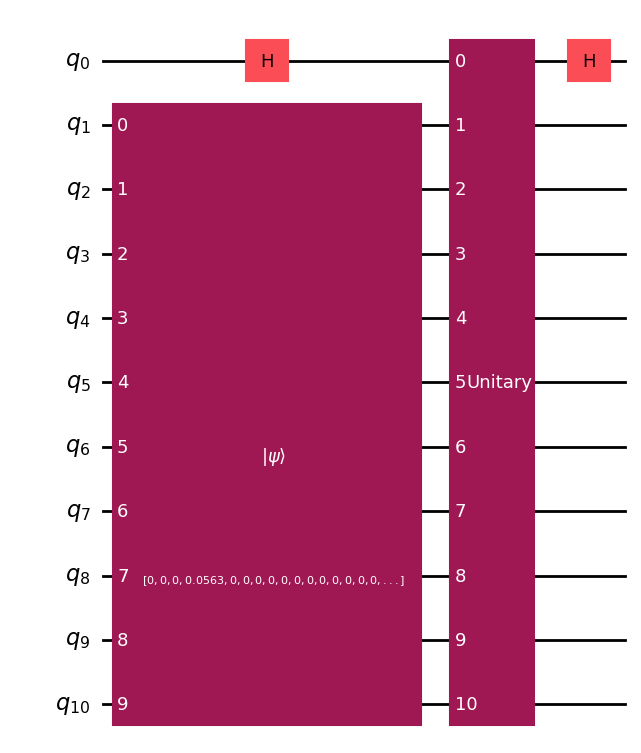

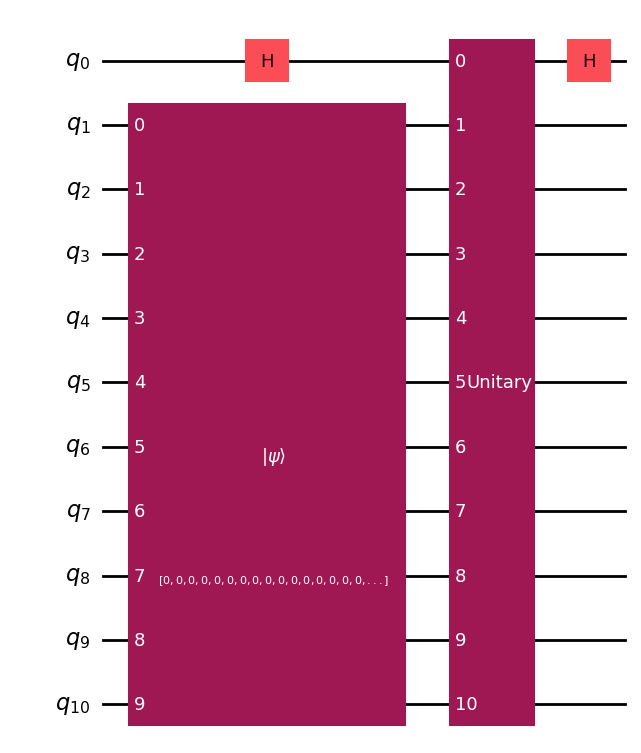

In [11]:
# Creating the circuit for horizontal scan
from qiskit import QuantumCircuit
qc_h_32 = QuantumCircuit(total_q_32)
qc_h_32.initialize(h_norm_image_32, range(1, total_q_32))
qc_h_32.h(0)
qc_h_32.unitary(Amp_permutation_unitary_32, range(total_q_32))
qc_h_32.h(0)

display(qc_h_32.draw('mpl', fold=-1))


# Create the circuit for vertical scan
qc_v_32 = QuantumCircuit(total_q_32)
qc_v_32.initialize(v_norm_image_32, range(1, total_q_32))
qc_v_32.h(0)
qc_v_32.unitary(Amp_permutation_unitary_32, range(total_q_32))
qc_v_32.h(0)

display(qc_v_32.draw('mpl', fold=-1))

# Combine both circuits into a single list
circ_list_32 = [qc_h_32, qc_v_32]

In [18]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex

# Initialize the simulator
simulator = AerSimulator()

# Transpile the circuits for the simulator
qc_h_32_t = transpile(qc_h_32, simulator)
qc_v_32_t = transpile(qc_v_32, simulator)

# Run the simulation for the horizontal scan circuit and get the statevector
state_vector_h_32 = Statevector.from_instruction(qc_h_32_t)

# Run the simulation for the vertical scan circuit and get the statevector
state_vector_v_32 = Statevector.from_instruction(qc_v_32_t)

# Print the size of the statevectors
print("Size of horizontal scan statevector: ", len(state_vector_h_32))
print("Size of vertical scan statevector: ", len(state_vector_v_32))

# Display the statevectors using LaTeX representation
print('Horizontal scan statevector:')
display(array_to_latex(state_vector_h_32, max_size=128))

print()

print('Vertical scan statevector:')
display(array_to_latex(state_vector_v_32, max_size=128))


Size of horizontal scan statevector:  2048
Size of vertical scan statevector:  2048
Horizontal scan statevector:


<IPython.core.display.Latex object>


Vertical scan statevector:


<IPython.core.display.Latex object>

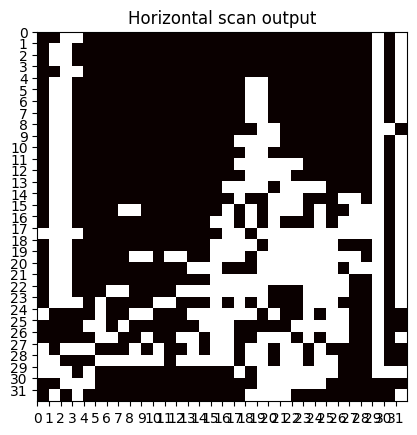

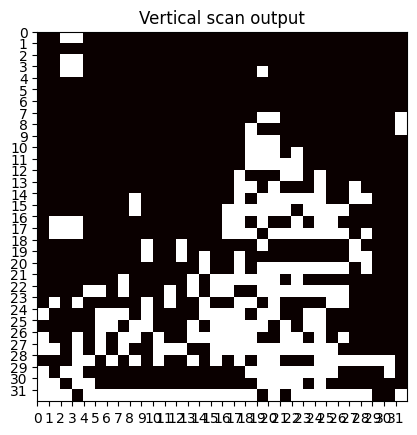

In [19]:
#  postprocessing for plotting the output (Classical)

# Defining a lambda function for thresholding to binary values
# returns true for specified Amplitude values else false
threshold = lambda amp: (amp > 1e-15 or amp < -1e-15)

# Selecting odd states from the raw statevector and
# reshaping column vector of size 64 to an 8x8 matrix
h_edge_scan_img_32 = np.abs(np.array([1 if threshold(state_vector_h_32[2*(i)+1].real) else 0 for i in range(2**data_q_32)])).reshape(32, 32)
v_edge_scan_img_32= np.abs(np.array([1 if threshold(state_vector_v_32[2*(i)+1].real) else 0 for i in range(2**data_q_32)])).reshape(32, 32).T

# Plotting the Horizontal and vertical scans
plot_image(h_edge_scan_img_32, 'Horizontal scan output')
plot_image(v_edge_scan_img_32, 'Vertical scan output')

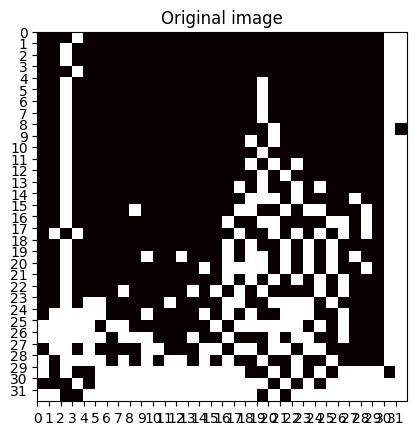

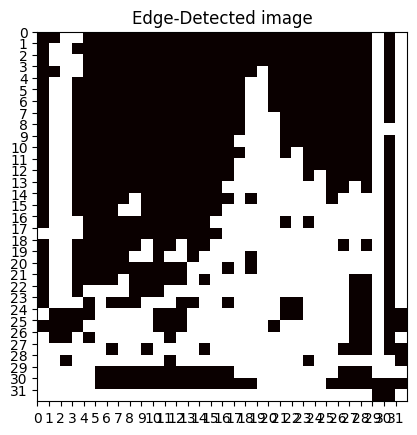

In [20]:
# Combining the horizontal and vertical component of the result by or operator
edge_scan_image_32 = h_edge_scan_img_32 | v_edge_scan_img_32

# Plotting the original and edge-detected images
plot_image(imgg, 'Original image')
plot_image(edge_scan_image_32, 'Edge-Detected image')